In [95]:
using Pkg; Pkg.activate("."); 
using StatsBase
using Revise
import MUST
using PyPlot
using Interpolations
using PyCall
using KernelDensity
using DelimitedFiles

MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2"

MUST.@get_help visual
pl = pyimport("matplotlib.pylab");

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/solar_model/Project.toml`


In [96]:
function colors(cmap, n)
    c = plt.get_cmap(cmap, n)
    [c((i-1)/n) for i in 1:n]
end

colors (generic function with 1 method)

In [97]:
eos_path = "input_data/solar_lte"
eos_path = "input_data/TSO_sun_Magg_v3.1"
sqEOS    = MUST.SquareGasEOS(MUST.@in_dispatch(eos_path));

The stagger model to compare with

In [98]:
folder_stagger = "/ptmp/peitner/model_grid/MUST.jl/examples/stagger2bifrost"
stagger        = MUST.Box("box_solar_stagger_TSOv9.1", folder=folder_stagger);
stagger_t      = MUST.Box("box_solar_stagger_TSOv9.1_t", folder=folder_stagger);

In [99]:
folders = [ MUST.@in_dispatch("data/TSO_sun_v9.1"),
            MUST.@in_dispatch("data/TSO_sun_v9.2"),
            MUST.@in_dispatch("data/TSO_sun_v9.7"),
            MUST.@in_dispatch("data/TSO_sun_v9.16"),
            MUST.@in_dispatch("data/TSO_sun_v9.17"),
            MUST.@in_dispatch("data/TSO_sun_TDZv3.1_int")]
snaps = [43, 35, 43, 43, 35, 43]

#=folders = [ MUST.@in_dispatch("data/TSO_sun_v8.1_profile"),
            MUST.@in_dispatch("data/TSO_sun_v3.1_profile"),
            MUST.@in_dispatch("data/TSO_sun_v7.1_profile")]
snaps = [34,32,27]=#

#folders = [ MUST.@in_dispatch("data/TSO_sun_TDZv3.1_int")]

model, model_t = [first(MUST.Boxes(folder1, snaps=[snaps[i]])) for (i,folder1) in enumerate(folders)], [last(MUST.Boxes(folder1, snaps=[snaps[i]])) for (i,folder1) in enumerate(folders)];

In [100]:
labels = ["default", "κ * 10", "κ / 10", "S4 * 10", "S4 *10, S1 / 10", "cooler adiabat"]
#labels = ["4","8","12"]

#labels = ["cooler adiabat"]
color = colors("rainbow", length(model)) ;

# Average T-z profiles

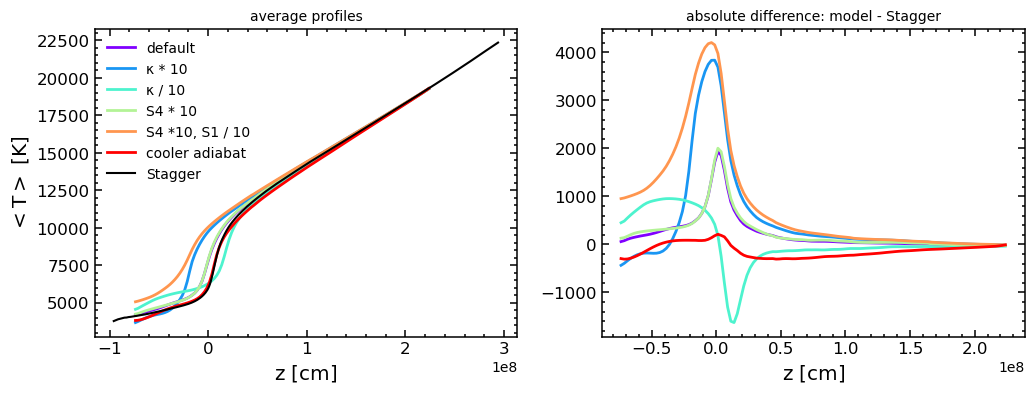

In [101]:
# Plotting
close()
f, ax = plt.subplots(1, 2, figsize=(12,4))
basic_plot!.(ax)


d_stagger  = MUST.plane_statistic(mean, stagger, :T)
z_stagger  = MUST.axis(stagger, :z)

for i in eachindex(model)
    d = MUST.plane_statistic(mean, model[i], :T)
    z = MUST.axis(model[i], :z)

    d_ip = Interpolations.linear_interpolation(z_stagger, d_stagger, extrapolation_bc = Line())(z)

    ax[1].plot(-z, d, label=labels[i], color=color[i], lw=2)
    ax[2].plot(-z, d .- d_ip, label=labels[i], color=color[i], lw=2)
end

## Stagger 
ax[1].plot(-z_stagger,  d_stagger,  color="k", label="Stagger")

## Plot style
ax[1].set_ylabel(L"\rm <T> \ [K]", fontsize="x-large")
ax[1].set_xlabel(L"\rm z \ [cm]", fontsize="x-large")
ax[2].set_xlabel(L"\rm z \ [cm]", fontsize="x-large")

ax[1].set_title("average profiles", fontsize="medium")
ax[2].set_title("absolute difference: model - Stagger", fontsize="medium")

ax[1].legend(framealpha=0, loc="upper left", fontsize="medium");

gcf()

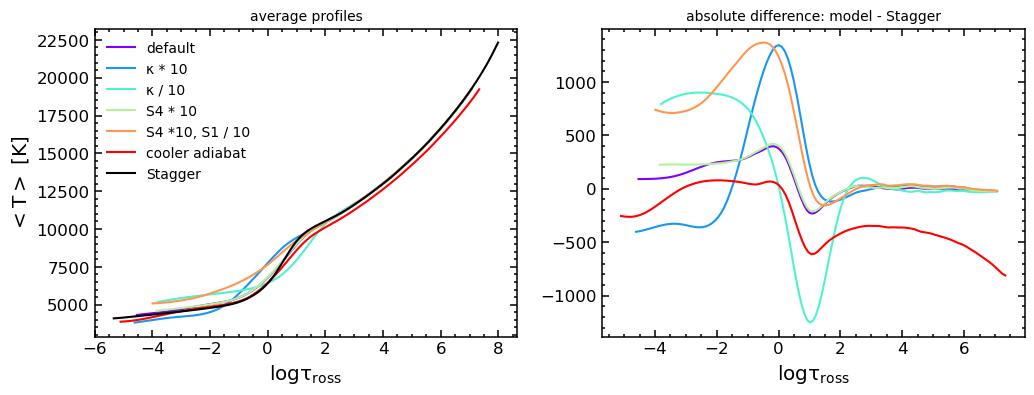

In [102]:
# Plotting
close()
f, ax = plt.subplots(1, 2, figsize=(12,4))
basic_plot!.(ax)


d_stagger  = MUST.plane_statistic(mean, stagger_t, :T)
z_stagger  = log10.(MUST.axis(stagger_t, :τ_ross, 3))

for i in eachindex(model)
    d = MUST.plane_statistic(mean, model_t[i], :T)
    z = log10.(MUST.axis(model_t[i], :τ_ross, 3))

    d_ip = Interpolations.linear_interpolation(reverse(z_stagger), reverse(d_stagger), extrapolation_bc = Line())(z)

    ax[1].plot(z, d, color=color[i], label=labels[i])
    ax[2].plot(z, d .- d_ip, color=color[i], label=labels[i])
end

## Stagger 
ax[1].plot(z_stagger,  d_stagger,  color="k", label="Stagger")

## Plot style
ax[1].set_ylabel(L"\rm <T> \ [K]", fontsize="x-large")
ax[1].set_xlabel(L"\rm \log \tau_{ross}", fontsize="x-large")
ax[2].set_xlabel(L"\rm \log \tau_{ross}", fontsize="x-large")

ax[1].set_title("average profiles", fontsize="medium")
ax[2].set_title("absolute difference: model - Stagger", fontsize="medium")

ax[1].legend(framealpha=0, loc="upper left", fontsize="medium");

gcf()

# Average $\rho$-z profiles

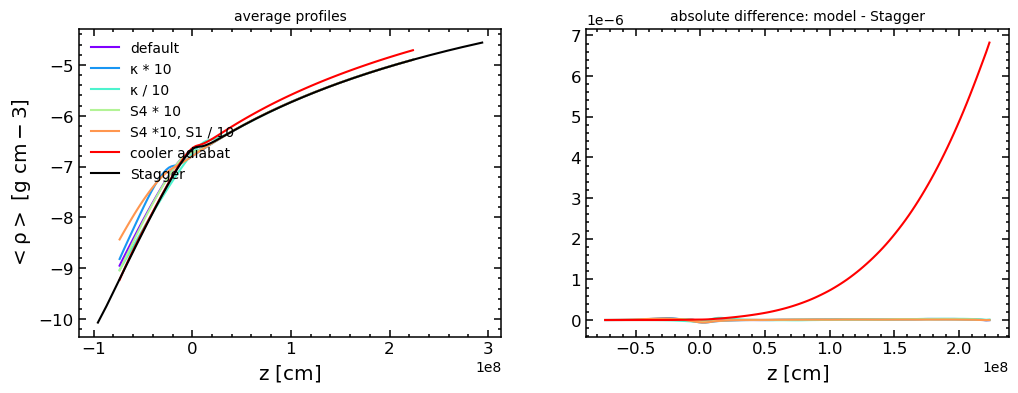

In [103]:
# Plotting
close()
f, ax = plt.subplots(1, 2, figsize=(12,4))
basic_plot!.(ax)


d_stagger  = MUST.plane_statistic(mean, stagger, :d)
z_stagger  = MUST.axis(stagger, :z)

for i in eachindex(model)
    d = MUST.plane_statistic(mean, model[i], :d)
    z = MUST.axis(model[i], :z)

    d_ip = Interpolations.linear_interpolation(z_stagger, d_stagger, extrapolation_bc = Line())(z)

    ax[1].plot(-z, log10.(d), color=color[i], label=labels[i])
    ax[2].plot(-z, d .- d_ip, color=color[i], label=labels[i])
end

## Stagger 
ax[1].plot(-z_stagger,  log10.(d_stagger),  color="k", label="Stagger")

## Plot style
ax[1].set_ylabel(L"\rm <\rho> \ [g \ cm-3]", fontsize="x-large")
ax[1].set_xlabel(L"\rm z \ [cm]", fontsize="x-large")
ax[2].set_xlabel(L"\rm z \ [cm]", fontsize="x-large")

ax[1].set_title("average profiles", fontsize="medium")
ax[2].set_title("absolute difference: model - Stagger", fontsize="medium")

ax[1].legend(framealpha=0, loc="upper left", fontsize="medium");

gcf()

# Average T-$\rho$ profiles

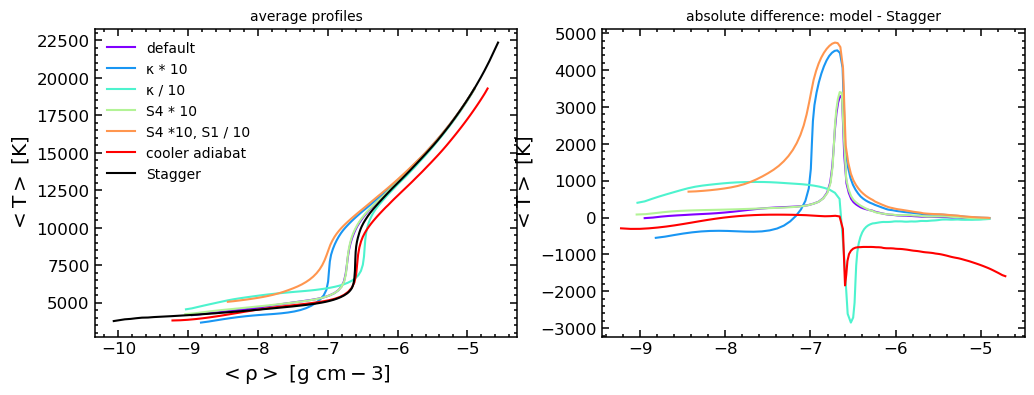

In [104]:
# Plotting
close()
f, ax = plt.subplots(1, 2, figsize=(12,4))
basic_plot!.(ax)


d_stagger  = MUST.plane_statistic(mean, stagger, :T)
z_stagger  = MUST.plane_statistic(mean, stagger, :d)


for i in eachindex(model)
    d = MUST.plane_statistic(mean, model[i], :T)
    z = MUST.plane_statistic(mean, model[i], :d)

    d_ip = Interpolations.linear_interpolation(reverse(z_stagger), reverse(d_stagger), extrapolation_bc = Line())(z)

    ax[1].plot(log10.(z), d, color=color[i], label=labels[i])
    ax[2].plot(log10.(z), d .- d_ip, color=color[i], label=labels[i])
end

## Stagger 
ax[1].plot(log10.(z_stagger), d_stagger, color="k", label="Stagger")

## Plot style
ax[1].set_xlabel(L"\rm <\rho> \ [g \ cm-3]", fontsize="x-large")
ax[1].set_ylabel(L"\rm <T> \ [K]", fontsize="x-large")
ax[2].set_ylabel(L"\rm <T> \ [K]", fontsize="x-large")

ax[1].set_title("average profiles", fontsize="medium")
ax[2].set_title("absolute difference: model - Stagger", fontsize="medium")

ax[1].legend(framealpha=0, loc="upper left", fontsize="medium");

gcf()